__Alejandro Gonzalez Garcia__
<br>
Date: Mar. 14, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 24: Binary stars</font></center>

## <font color=#46769B>Introduction</font>

The $n$-body problem considers $n$ objects interacting through gravity. Here we will provide some general instruction for how to setup the problem. In the Exercise, you will have to consider two- and three-body problems.

Consider two masses, $m_1$ and $m_2$, located at positions $\mathbf{r}_1 = (x_1, y_1, z_1)$ and $\mathbf{r}_2 = (x_2, y_2, z_2)$, respectively. Newton's law of gravitation tells us that the magnitude of the gravitational force between them is

$$F = \frac{G m_1 m_2}{|\mathbf r_1 - \mathbf r_2|^2} \, .$$

Here we must consider Newton's law of gravitation as a *vector* equation, since we must know in which direction the gravitational force points. The gravitational force that $m_2$ exerts on $m_1$ points from $m_1$ to $m_2$, so it is helpful to define a vector $\mathbf{r}_{21} = \mathbf{r}_2 - \mathbf{r}_1$ that points in this direction. Similarly, $\mathbf{r}_{12} = \mathbf{r}_1 - \mathbf{r}_2$ is the direction from $m_2$ to $m_1$, which is the direction of the force acting on $m_2$ due to $m_1$.

Now we can express Newton's law of gravitation in vector form. The force acting on $m_1$ (due to $m_2$) is

$$\mathbf{F}_1 = \frac{G m_1 m_2}{|\mathbf{r}_{21}|^2} \hat{\mathbf{r}}_{21} = \frac{G m_1 m_2 \mathbf{r}_{21} }{|\mathbf{r}_{21}|^3} \, .$$

The unit vector $\hat{\mathbf{r}}_{21} = \mathbf{r}_{21}/|\mathbf{r}_{21}|$ determines the direction of the force. Similarly, the force acting on $m_2$ (due to $m_2$) is

$$\mathbf{F}_2 = \frac{G m_1 m_2}{|\mathbf{r}_{12}|^2} \hat{\mathbf{r}}_{12} = \frac{G m_1 m_2 \mathbf{r}_{12} }{|\mathbf{r}_{12}|^3} \, .$$

Next, we write Newton's second law as

$$\mathbf{r}_1''(t) = \mathbf{a}_1(t,\mathbf{r}_1,\mathbf{r}_2) \, , \quad 
\mathbf{r}_2''(t) = \mathbf{a}_2(t,\mathbf{r}_1,\mathbf{r}_2)$$

where the acceleration functions are

$$\mathbf{a}_1(t,\mathbf{r}_1,\mathbf{r}_2) = \frac{\mathbf{F}_1}{m_1} = \frac{G m_2 \mathbf{r}_{21}}{|\mathbf{r}_{21}|^3} \, , \qquad \mathbf{a}_2(t,\mathbf{r}_1,\mathbf{r}_2) = \frac{\mathbf{F}_2}{m_2} = \frac{G m_1 \mathbf{r}_{12}}{|\mathbf{r}_{12}|^3} \, .$$

We also need to define the velocities $\mathbf{v}_1(t) = \mathbf{r}_1'(t)$ and $\mathbf{v}_2(t) = \mathbf{r}_2'(t)$.
Lastly, just to be very clear what everything means, we have:

$$\mathbf{r}_{21} = - \mathbf{r}_{12} = \left( x_2 - x_1, \, y_2 - y_1, \, z_2 - z_1 \right) \, , \quad
|\mathbf{r}_{21}| = |\mathbf{r}_{12}|= \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2} \, .$$

Now, we want to consider how to solve a system like this using the leapfrog algorithm. First, we want to write Newton's second law as a single equation

$$\mathbf{r}''(t) = \mathbf{a}(t,\mathbf r)$$

where we have combined

$$\mathbf{r}(t) = \left( \begin{array}{c} \mathbf{r}_1(t) \\ \mathbf{r}_2(t) \end{array} \right) \, , \qquad
\mathbf{v}(t) = \left( \begin{array}{c} \mathbf{v}_1(t) \\ \mathbf{v}_2(t) \end{array} \right) \, , \qquad
\mathbf{a}(t,\mathbf{r}) = \left( \begin{array}{c} \mathbf{a}_1(t,\mathbf{r}_1,\mathbf{r}_2) \\ \mathbf{a}_2(t,\mathbf{r}_1,\mathbf{r}_2) \end{array} \right) \, .$$ 

So, the main task for implementing the leapfrog algorithm is just coding up the appropriate acceleration function $\mathbf{a}$. We will define a function `a(t,r)` where the input `r` will be a 6-component `numpy.array` containing $(x_1, y_1, z_1, x_2, y_2, z_2)$. Here is some example code:
```py
def a(t,r):
    # Unpack r into r1 and r2
    r1 = r[:3] # Take first three entries
    r2 = r[3:] # Take last three entries
    
    # Compute vectors
    r12 = r1 - r2
    r21 = r2 - r1
    
    # Compute magnitudes
    r12_mag = np.linalg.norm(r12)
    r21_mag = r12_mag
    
    # Compute a1 and a2
    a1 = G*m2*r21/r21_mag**3
    a2 = G*m1*r12/r12_mag**3
    
    # Combine and return a = (a1, a2)
    return np.concatenate((a1,a2))    
```

Next, we turn to the case with $n>2$ bodies. In general, the acceleration function $\mathbf{a}_i$ for mass $m_i$ is the computed as the *total* gravitational force from all *other* masses $m_j$:

$$\mathbf{a}_i(t, \mathbf{r}_1,..., \mathbf{r}_n)  = \sum_{j=1\\i\ne j}^n \frac{G m_j \mathbf{r}_{ji}}{|\mathbf{r}_{ji}|^3}  \, .$$

That is, the sum runs over all masses *except* $j = i$, i.e., we do not consider the gravitational force of a mass on itself.

Finally, a discussion about units:
- Masses will be given in solar masses:  $1 \, M_\odot$ is the mass of the Sun.
- Distances will be given in *astronomical units* (AU), which is the Earth-Sun distance.
- Time will be given in *years*
- Velocity will be in *AU/year*, which is about 4.7 km/s.
- In these units, Newton's constant is approximately

$$G = 39.42 \; {\rm AU}^3 \, {\rm yr}^{-2} \, M_\odot^{-1}$$


The goals of this exercise are:
- Gain experience with using leapfrog methods for solving two- and three-body problems

Required reading:
- *Lesson 11: Leapfrog method*


## <font color=#46769B>Exercise: Part (a): Binary stars</font>

A large fraction of stars in our galaxy form binary pairs. We will consider two equal mass stars, $m_1 = m_2 = 1 \, M_\odot$. At time $t=0$, assume they are separated by a distance $d=1 \; {\rm AU}$, with the following initial positions

$$\mathbf{r}_1(0) = (\tfrac{d}{2},0,0) \, , \quad \mathbf{r}_2(0) = (-\tfrac{d}{2},0,0) \, .$$

and initial velocities

$$\mathbf{v}_1(0) = (0,\sqrt{\tfrac{Gm}{2d}},0) \, , \quad \mathbf{v}_2(0) = (0,-\sqrt{\tfrac{Gm}{2d}},0) \, .$$

The initial velocity is chosen so that the binary stars are expected to have circular trajectories, and their exact solutions are

$$\mathbf{r}_1(t) = \left(\tfrac{d}{2} \cos(\omega t),\tfrac{d}{2}\sin(\omega t),0\right) \, , \qquad
\mathbf{r}_2(t) = -\left(\tfrac{d}{2} \cos(\omega t),\tfrac{d}{2}\sin(\omega t),0\right) \, ,$$

where the angular frequency is $\omega = \sqrt{2 G m/d^3}$.

Your tasks are:
- Write a code to solve for $\mathbf{r}_1(t)$ and $\mathbf{r}_2(t)$ numerically using the leapfrog method, implementing the acceleration function given above, for time $t$ the range $[0,10]$. Choose a reasonable value for the number of steps $N$, but you don't need to perform a convergence test.
- Make a plot showing $x_1(t)$ and $x_2(t)$ as function of $t$ for your numerical solution and the exact solution.

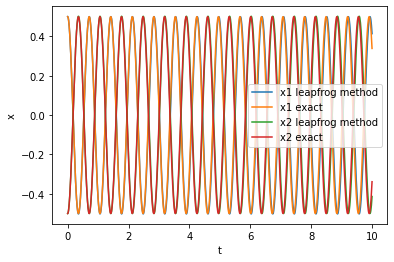

my solutions match the exact solutions.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

num_steps = 10**3
m1 = m2 = m = 1 
t0,tf  = 0 , 10
t = np.linspace(t0,tf,num_steps+1)
h = t[1] - t[0]
d = 1 
G = 39.42
omega = np.sqrt(2*G*m/d**3)

r10 = np.array((d/2,0,0))
r20 = np.array((-d/2,0,0))

v10 = np.array((0, np.sqrt(G*m/(2*d)),0))
v20 = np.array((0,-np.sqrt(G*m/(2*d)),0))

r0 = np.concatenate((r10,r20))
v0 = np.concatenate((v10,v20))


r = np.zeros((num_steps+1,6))
v = np.zeros((num_steps+1,6))

r[0] = r0 
v[0] = v0

def accel(t,r):
  r1 = r[:3]
  r2 = r[3:]

  r12 = r1 - r2 
  r21 = r2 - r1

  r12_mag = np.linalg.norm(r12)
  r21_mag = r12_mag 

  a1 = G*m2*r21/r21_mag**3
  a2 = G*m1*r12/r12_mag**3 

  return np.concatenate((a1,a2))

a = accel(t0,r0)

for i in range(num_steps):
  v_half = v[i] + h/2 * a 
  r[i+1] = r[i] + h*v_half
  a = accel(t[i+1],r[i+1])
  v[i+1] = v_half + h/2 * a 

r1 = r[:,:3]
r2 = r[:,3:]

x1 = r1[:,0]
x2 = r2[:,0]

plt.plot(t,x1,label='x1 leapfrog method')
plt.plot(t,d/2*np.cos(omega*t),label='x1 exact')
plt.plot(t,x2,label='x2 leapfrog method')
plt.plot(t,-d/2*np.cos(omega*t),label='x2 exact')
plt.legend()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

print('my solutions match the exact solutions.')

## <font color=#46769B>Exercise: Part (b): Wandering black holes</font>

It is of great interest to know how many black holes (BHs) there are in our galaxy and throughout the Universe. BHs form at the ends of the lives of massive stars. It is also hypothesized that other BHs could potentially be leftover from the beginning of the Universe itself. However, BHs randomly wandering through our galaxy are challenging to observe, though very recently one possible object was discovered for the [first time](https://www.sciencealert.com/for-the-first-time-a-lone-black-hole-has-been-found-wandering-the-milky-way).

One possible way to constrain the existance of BHs is to study their effect on binary stars. In a nutshell, if a massive BH passes close to a binary pair, it is possible the pair can be disrupted. Here we will perform a simulation to study this effect.

Consider two stars, with initial conditions as defined in Part (a). We will add a third body to the numerical simulation, namely, the BH, with mass $m_3 = m_{\rm BH}$. Its initial condition will be defined by

$$\mathbf{r}_{3}(0) = (-300, 0.5, 0.5) \; {\rm AU} \, , \quad \mathbf{v}_3(0) = (50,0,0) \; {\rm AU/yr} \, .$$

Perform the following tasks:
- Generalize your code from Part (a) to include a third body. The idea is to solve Newton's second law $\mathbf{r}''(t) = \mathbf{a}(t,\mathbf{r})$ where
$$\mathbf{r}(t) = \left( \begin{array}{c} \mathbf{r}_1(t) \\ \mathbf{r}_2(t) \\ \mathbf{r}_3(t) \end{array} \right) \, , \qquad
\mathbf{v}(t) = \left( \begin{array}{c} \mathbf{v}_1(t) \\ \mathbf{v}_2(t)\\ \mathbf{v}_3(t) \end{array} \right) \, , \qquad
\mathbf{a}(t,\mathbf{r}) = \left( \begin{array}{c} \mathbf{a}_1(t,\mathbf{r}_1,\mathbf{r}_2,\mathbf{r}_3) \\ \mathbf{a}_2(t,\mathbf{r}_1,\mathbf{r}_2,\mathbf{r}_3) \\ \mathbf{a}_3(t,\mathbf{r}_1,\mathbf{r}_2,\mathbf{r}_3)\end{array} \right)$$
include all three bodies.
- Use the leapfrog method to obtain numerical solutions for $\mathbf{r}_1$, $\mathbf{r}_2$, and $\mathbf{r}_3$ for $t$ in the range $[0,20]$.
- Determine whether the binary pair is still bound at the end of your simulation: 
    - Plot $|\mathbf{r}_{12}(t)|$ as a function of $t$. If the stars are unbound from one another, you would expect $|\mathbf{r}_{12}|$ to grow in time.
    - Compute the energy $E = T + U$ for the stars at the final time $t_f = 20$. The potential energy for the stars is
    $$U = - \frac{G m^2}{|\mathbf{r}_{12}|} \, .$$
    The *relative* kinetic energy of the stars (i.e., not including their overall center-of-mass motion) is 
    $$T = \frac{1}{2} \frac{m_1 m_2}{m_1 + m_2} |\mathbf{v}_1 - \mathbf{v}_2|^2 \, .$$
    If $E < 0$, the system is *bound*. If $E > 0$, the system is *unbound*.
- Repeat the above steps for different values of the black hole mass $m_{\rm BH}$ to determine approximately what value of $m_{\rm BH}$ will separate the binary pair.
    

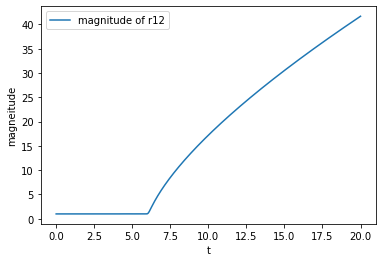

the energy at this value m_bh is 0.18319994526898908
after some trial and error, it seems as if the system
becomes unbound at a value m_bh of roughly 2.45
this value was obtained through observation


In [4]:
t0, tf = 0, 20 
t = np.linspace(t0,tf,num_steps+1)
h = t[1] - t[0]

m_bh = 2.45

#starting position and velocity for m3
r30 = np.array([-300,0.5,0.5])
v30 = np.array([50,0,0])

#new starting position and velocity 
r0 = np.concatenate((r10,r20,r30))
v0 = np.concatenate((v10,v20,v30))

r = np.zeros((num_steps+1,9))
v = np.zeros((num_steps+1,9))

r[0] = r0 
v[0] = v0 

#define new acceleration function with all 3 masses
def accel(t,r):
  r1 = r[:3]
  r2 = r[3:6]
  r3 = r[6:9]

  r12 = r1 - r2
  r21 = r2 - r1
  r13 = r1 - r3
  r31 = r3 - r1
  r23 = r2 - r3 
  r32 = r3 - r2

  r12_mag = np.linalg.norm(r12)
  r21_mag = r12_mag 
  r13_mag = np.linalg.norm(r13)
  r31_mag = r13_mag 
  r23_mag = np.linalg.norm(r23)
  r32_mag = r23_mag

  a1 = (G*m2*r21/r21_mag**3) + (G*m_bh*r31/r31_mag**3)
  a2 = (G*m1*r12/r12_mag**3) + (G*m_bh*r32/r32_mag**3)
  a3 = (G*m1*r13/r13_mag**3) + (G*m2*r23/r23_mag**3)

  return np.concatenate((a1,a2,a3))

a = accel(t0,r0)

for i in range(num_steps):
  v_half = v[i] + h/2 * a 
  r[i+1] = r[i] + h*v_half
  a = accel(t[i+1],r[i+1])
  v[i+1] = v_half + h/2 * a 

#derive r vectors for each mass
r1 = r[:,:3]
r2 = r[:,3:6]
r3 = r[:,6:9]

#get r12 values for each time t 
r12 = r1 - r2 

r12_mag = [] 

for i in range(len(r12)):
  r12_dummy = np.linalg.norm(r12[i])
  r12_mag.append(r12_dummy)

#plot r12 as a function of t
plt.plot(t,r12_mag,label='magnitude of r12')
plt.legend()
plt.xlabel('t')
plt.ylabel('magneitude')
plt.show()

#calculate energies using final value of r12 and v12
r12_length = len(r12)
r12_last = r12[num_steps]
r12_mag = np.linalg.norm(r12_last)

v1 = v[:,:3]
v2 = v[:,3:6]

v12 = v1 - v2 
v12_last = v12[num_steps]
v12_mag = np.linalg.norm(v12_last)

U = -G*m**2 / r12_mag
T = 0.5 * (m1*m2/(m1+m2)) * v12_mag**2

E = T + U 
print('the energy at this value m_bh is', E) 

print('after some trial and error, it seems as if the system')
print('becomes unbound at a value m_bh of roughly 2.45')
print('this value was obtained through observation')